# Fetch from MIT data

Source:
1. https://shakespeare.mit.edu/
2. https://github.com/nrennie/shakespeare?tab=readme-ov-file
3. Elegy: https://github.com/TheMITTech/shakespeare/blob/master/Poetry/elegy.txt

Elegy was taken from different source since the second source does not have the elegy text

In [ ]:
import os
import pandas as pd
import zipfile
from google.colab import files
# !pip install tensorflow
import re
import string
import nltk
import spacy
from tensorflow.keras.preprocessing.text import Tokenizer
# nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/metadata-mit.csv')
metadata['File'] = metadata['File'].apply(lambda x: f"{x}.csv")
metadata

Title   Genre  \
0                            All's Well That Ends Well  Comedy   
1                                       As You Like It  Comedy   
2                                 The Comedy of Errors  Comedy   
3                                            Cymbeline  Comedy   
4                                  Love's Labours Lost  Comedy   
..                                                 ...     ...   
190  CL. O, from what power hast thou this powerful...  Sonnet   
191  CLI. Love is too young to know what conscience...  Sonnet   
192   CLII. In loving thee thou know'st I am forsworn,  Sonnet   
193   CLIII. Cupid laid by his brand, and fell asleep:  Sonnet   
194        CLIV. The little Love-god lying once asleep  Sonnet   

                                                   URL               File  
0       https://shakespeare.mit.edu/allswell/full.html       allswell.csv  
1    https://shakespeare.mit.edu/asyoulikeit/full.html    asyoulikeit.csv  
2    https://shakespeare.mit.edu/comedy_errors/full...  comedy_errors.csv  
3      https://shakespeare.mit.edu/cymbeline/full.html      cymbeline.csv  
4            https://shakespeare.mit.edu/lll/full.html            lll.csv  
..                                                 ...                ...  
190  https://shakespeare.mit.edu/Poetry/sonnet.CL.html       sonnetCL.csv  
191  https://shakespeare.mit.edu/Poetry/sonnet.CLI....      sonnetCLI.csv  
192  https://shakespeare.mit.edu/Poetry/sonnet.CLII...     sonnetCLII.csv  
193  https://shakespeare.mit.edu/Poetry/sonnet.CLII...    sonnetCLIII.csv  
194  https://shakespeare.mit.edu/Poetry/sonnet.CLIV...     sonnetCLIV.csv  

[195 rows x 4 columns]

In [ ]:
metadata[metadata['File'] == 'elegy.csv']

Title   Genre  \
40  Funeral Elegy by W.S.  Poetry   

                                              URL       File  
40  https://shakespeare.mit.edu/Poetry/elegy.html  elegy.csv

## Merge all data

In [ ]:
zipFile = zipfile.ZipFile('/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/shakespeare-main.zip')
zipFile.extractall('/tmp')
zipFile.close()

1. History, comedy, tragedy genres have "act", "scene", "character", "dialogue", "line_number"
2. Poetry genre has "line", "stanza", "line_number"

In [ ]:
source = '/tmp/shakespeare-main/data'
list_df = []

standard_columns = [
    "line",	"line_number", "act",	"scene",	"character",	"stanza"
]

column_mapping = {
    "dialogue": "line",
    "line_number": "line_number",
    "stanza": "stanza",
    "act": "act",
    "scene": "scene",
    "character": "character"
}


for name in os.listdir(source):
  if name.endswith(".csv"):
    path = os.path.join(source, name)
    df = pd.read_csv(path)
    if "dialogue" in df.columns:
      df.rename(columns={'dialogue': 'line'}, inplace=True)
    for col in standard_columns:
      if col not in df.columns:
        df[col] = None

    # df.rename(columns=column_mapping, inplace=True)
    df['File'] = metadata.loc[metadata['File'] == name, 'Title'].values[0]
    df['Genre'] = metadata.loc[metadata['File'] == name, 'Genre'].values[0]
    # print(df.columns)
    print(path)
    print(len(df))
    list_df.append(df)


all_df = pd.concat(list_df, ignore_index=True)
all_df.to_parquet('shakespeare_mit.parquet', compression='snappy')
files.download('shakespeare_mit.parquet')
print(f"Successfully converted {source} to shakespeare_mit.parquet")

/tmp/shakespeare-main/data/sonnetCXLIII.csv
14
/tmp/shakespeare-main/data/sonnetXLVII.csv
14
/tmp/shakespeare-main/data/timon.csv
2640
/tmp/shakespeare-main/data/sonnetLXXXI.csv
14
/tmp/shakespeare-main/data/sonnetXXXI.csv
14
/tmp/shakespeare-main/data/sonnetLXXXV.csv
14
/tmp/shakespeare-main/data/sonnetLXII.csv
14
/tmp/shakespeare-main/data/tempest.csv
2388
/tmp/shakespeare-main/data/sonnetCXIII.csv
14
/tmp/shakespeare-main/data/asyoulikeit.csv
2794
/tmp/shakespeare-main/data/RapeOfLucrece.csv
1858
/tmp/shakespeare-main/data/sonnetCXLVI.csv
14
/tmp/shakespeare-main/data/sonnetXXXIV.csv
14
/tmp/shakespeare-main/data/sonnetXXV.csv
14
/tmp/shakespeare-main/data/sonnetLXXX.csv
14
/tmp/shakespeare-main/data/winters_tale.csv
3469
/tmp/shakespeare-main/data/sonnetVIII.csv
14
/tmp/shakespeare-main/data/sonnetXC.csv
14
/tmp/shakespeare-main/data/sonnetLXXII.csv
14
/tmp/shakespeare-main/data/sonnetC.csv
14
/tmp/shakespeare-main/data/cymbeline.csv
3927
/tmp/shakespeare-main/data/sonnetCXXXV.csv


<ipython-input-19-3bcba970cc26>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_df = pd.concat(list_df, ignore_index=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully converted /tmp/shakespeare-main/data to shakespeare_mit.parquet


Elegy has 0 rows (No data)

## Handle Elegy.txt

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
with open("/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/elegy.txt", "r") as f:
  df_elegy_html = f.read()

df_elegy = BeautifulSoup(df_elegy_html).get_text()
index = re.search('Since time, and his predestinated end,', df_elegy).start()
df_elegy = df_elegy[index:]
df_elegy

'Since time, and his predestinated end,\n        Abridged the circuit of his hopeful days,\n        Whiles both his youth and virtue did intend\n        The good endeavors of deserving praise,\n5       What memorable monument can last\n        Whereon to build his never-blemished name\n        But his own worth, wherein his life was graced. . .\n        Sith as that ever he maintained the same?\n        Oblivion in the darkest day to come,\n10      When sin shall tread on merit in the dust,\n\n\n        Cannot rase out the lamentable tomb\n        Of his short-lived deserts; but still they must,\n        Even in the hearts and memories of men,\n        Claim fit respect, that they, in every limb\n15      Remembering what he was, with comfort then\n        May pattern out one truly good, by him.\n        For he was truly good, if honest care\n        Of harmless conversation may commend\n        A life free from such stains as follies are,\n20      Ill recompensed only in his end.\n    

In [ ]:
elegy_line = df_elegy.strip().split("\n")
elegy_line = [i.strip() for i in elegy_line if i.strip()]
elegy_line

['Since time, and his predestinated end,',
 'Abridged the circuit of his hopeful days,',
 'Whiles both his youth and virtue did intend',
 'The good endeavors of deserving praise,',
 '5       What memorable monument can last',
 'Whereon to build his never-blemished name',
 'But his own worth, wherein his life was graced. . .',
 'Sith as that ever he maintained the same?',
 'Oblivion in the darkest day to come,',
 '10      When sin shall tread on merit in the dust,',
 'Cannot rase out the lamentable tomb',
 'Of his short-lived deserts; but still they must,',
 'Even in the hearts and memories of men,',
 'Claim fit respect, that they, in every limb',
 '15      Remembering what he was, with comfort then',
 'May pattern out one truly good, by him.',
 'For he was truly good, if honest care',
 'Of harmless conversation may commend',
 'A life free from such stains as follies are,',
 '20      Ill recompensed only in his end.',
 'Nor can the tongue of him who loved him least',
 '(If there can be 

In [ ]:
elegy_data = {'line': [], 'line_number': [], 'stanza': []}

stanza_counter = 1
line_counter = 0
for i in elegy_line:
  line_counter += 1
  if re.match(r"^\d+", i):
    line_counter = 1
    stanza_counter+=1
    new_i = re.sub(r"^\d+\s*", "", i).strip()
    elegy_data['line'].append(new_i)
  else:
    elegy_data['line'].append(i)

  elegy_data['line_number'].append(line_counter)
  elegy_data['stanza'].append(stanza_counter)

In [ ]:
finaldf_elegy = pd.DataFrame(elegy_data)
finaldf_elegy.head()

line  line_number  stanza
0       Since time, and his predestinated end,            1       1
1    Abridged the circuit of his hopeful days,            2       1
2  Whiles both his youth and virtue did intend            3       1
3      The good endeavors of deserving praise,            4       1
4             What memorable monument can last            1       2

In [ ]:
finaldf_elegy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   line         578 non-null    object
 1   line_number  578 non-null    int64 
 2   stanza       578 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.7+ KB


In [ ]:
finaldf_elegy['act'] = None
finaldf_elegy['scene'] = None
finaldf_elegy['character'] = None
finaldf_elegy['File'] = 'Funeral Elegy by W.S.'
finaldf_elegy['Genre'] = 'Poetry'

column_order = ["line", "line_number", "act", "scene", "character", "stanza", "File", "Genre"]
finaldf_elegy = finaldf_elegy[column_order]
finaldf_elegy.head(10)

line  line_number   act scene  \
0             Since time, and his predestinated end,            1  None  None   
1          Abridged the circuit of his hopeful days,            2  None  None   
2        Whiles both his youth and virtue did intend            3  None  None   
3            The good endeavors of deserving praise,            4  None  None   
4                   What memorable monument can last            1  None  None   
5          Whereon to build his never-blemished name            2  None  None   
6  But his own worth, wherein his life was graced...            3  None  None   
7          Sith as that ever he maintained the same?            4  None  None   
8               Oblivion in the darkest day to come,            5  None  None   
9         When sin shall tread on merit in the dust,            1  None  None   

  character  stanza                   File   Genre  
0      None       1  Funeral Elegy by W.S.  Poetry  
1      None       1  Funeral Elegy by W.S.  Poetry  
2      None       1  Funeral Elegy by W.S.  Poetry  
3      None       1  Funeral Elegy by W.S.  Poetry  
4      None       2  Funeral Elegy by W.S.  Poetry  
5      None       2  Funeral Elegy by W.S.  Poetry  
6      None       2  Funeral Elegy by W.S.  Poetry  
7      None       2  Funeral Elegy by W.S.  Poetry  
8      None       2  Funeral Elegy by W.S.  Poetry  
9      None       3  Funeral Elegy by W.S.  Poetry

In [ ]:
finaldf_elegy.to_parquet("elegy_final.parquet", index=False)

## Data Cleaning

In [ ]:
df_mit = pd.read_parquet("/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/shakespeare_mit.parquet")
df_mit.head(10)

line  line_number   act scene  \
0           Lo! as a careful housewife runs to catch          1.0  None  None   
1         One of her feather'd creatures broke away,          2.0  None  None   
2     Sets down her babe and makes an swift dispatch          3.0  None  None   
3       In pursuit of the thing she would have stay,          4.0  None  None   
4     Whilst her neglected child holds her in chase,          5.0  None  None   
5         Cries to catch her whose busy care is bent          6.0  None  None   
6        To follow that which flies before her face,          7.0  None  None   
7          Not prizing her poor infant's discontent;          8.0  None  None   
8  So runn'st thou after that which flies from thee,          9.0  None  None   
9          Whilst I thy babe chase thee afar behind;         10.0  None  None   

  character  stanza                                              File   Genre  
0      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
1      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
2      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
3      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
4      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
5      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
6      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
7      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
8      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
9      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet

In [ ]:
df_elegy = pd.read_parquet("/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/elegy_final.parquet")
df_elegy.head(10)

line  line_number   act scene  \
0             Since time, and his predestinated end,            1  None  None   
1          Abridged the circuit of his hopeful days,            2  None  None   
2        Whiles both his youth and virtue did intend            3  None  None   
3            The good endeavors of deserving praise,            4  None  None   
4                   What memorable monument can last            1  None  None   
5          Whereon to build his never-blemished name            2  None  None   
6  But his own worth, wherein his life was graced...            3  None  None   
7          Sith as that ever he maintained the same?            4  None  None   
8               Oblivion in the darkest day to come,            5  None  None   
9         When sin shall tread on merit in the dust,            1  None  None   

  character  stanza                   File   Genre  
0      None       1  Funeral Elegy by W.S.  Poetry  
1      None       1  Funeral Elegy by W.S.  Poetry  
2      None       1  Funeral Elegy by W.S.  Poetry  
3      None       1  Funeral Elegy by W.S.  Poetry  
4      None       2  Funeral Elegy by W.S.  Poetry  
5      None       2  Funeral Elegy by W.S.  Poetry  
6      None       2  Funeral Elegy by W.S.  Poetry  
7      None       2  Funeral Elegy by W.S.  Poetry  
8      None       2  Funeral Elegy by W.S.  Poetry  
9      None       3  Funeral Elegy by W.S.  Poetry

In [ ]:
df_mit = pd.concat([df_mit, df_elegy], ignore_index=True)
df_mit.head()

line  line_number   act scene  \
0        Lo! as a careful housewife runs to catch          1.0  None  None   
1      One of her feather'd creatures broke away,          2.0  None  None   
2  Sets down her babe and makes an swift dispatch          3.0  None  None   
3    In pursuit of the thing she would have stay,          4.0  None  None   
4  Whilst her neglected child holds her in chase,          5.0  None  None   

  character  stanza                                              File   Genre  
0      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
1      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
2      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
3      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
4      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet

In [ ]:
len(df_mit['File'].unique())

195

In [ ]:
df_mit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119989 entries, 0 to 119988
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   line         119989 non-null  object 
 1   line_number  114352 non-null  float64
 2   act          113522 non-null  object 
 3   scene        113820 non-null  object 
 4   character    113864 non-null  object 
 5   stanza       3969 non-null    float64
 6   File         119989 non-null  object 
 7   Genre        119989 non-null  object 
dtypes: float64(2), object(6)
memory usage: 7.3+ MB


In [ ]:
df_mit = df_mit[df_mit['character'] != '[stage direction]']
df_mit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114352 entries, 0 to 119988
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   line         114352 non-null  object 
 1   line_number  114352 non-null  float64
 2   act          107904 non-null  object 
 3   scene        108186 non-null  object 
 4   character    108227 non-null  object 
 5   stanza       3969 non-null    float64
 6   File         114352 non-null  object 
 7   Genre        114352 non-null  object 
dtypes: float64(2), object(6)
memory usage: 7.9+ MB


In [ ]:
df_mit[df_mit['act'].isnull()==True]

line  line_number   act  \
0                Lo! as a careful housewife runs to catch          1.0  None   
1              One of her feather'd creatures broke away,          2.0  None   
2          Sets down her babe and makes an swift dispatch          3.0  None   
3            In pursuit of the thing she would have stay,          4.0  None   
4          Whilst her neglected child holds her in chase,          5.0  None   
...                                                   ...          ...   ...   
119984    Drive me beyond myself, fast friend, soon lost,          5.0  None   
119985           Long may thy worthiness thy name advance          1.0  None   
119986           Amongst the virtuous and deserving most,          2.0  None   
119987              Who herein hast forever happy proved:          3.0  None   
119988  In life thou lived'st, in death thou died'st b...          4.0  None   

       scene character  stanza  \
0       None      None     NaN   
1       None      None     NaN   
2       None      None     NaN   
3       None      None     NaN   
4       None      None     NaN   
...      ...       ...     ...   
119984  None      None   115.0   
119985  None      None   116.0   
119986  None      None   116.0   
119987  None      None   116.0   
119988  None      None   116.0   

                                                    File   Genre  
0       CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
1       CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
2       CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
3       CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
4       CXLIII. Lo! as a careful housewife runs to catch  Sonnet  
...                                                  ...     ...  
119984                             Funeral Elegy by W.S.  Poetry  
119985                             Funeral Elegy by W.S.  Poetry  
119986                             Funeral Elegy by W.S.  Poetry  
119987                             Funeral Elegy by W.S.  Poetry  
119988                             Funeral Elegy by W.S.  Poetry  

[6448 rows x 8 columns]

In [ ]:
gen = df_mit[df_mit['act'].isnull()==True]
gen['Genre'].unique()

array(['Sonnet', 'Poetry', 'History', 'Comedy'], dtype=object)

In [ ]:
col_name = []
unique_valList = []
per_unique_vaList = []

for i in df_mit.columns:
  col_name.append(i)
  count = df_mit[i].count()
  unique_val = df_mit[i].nunique()
  per_unique_val = unique_val * 100 /count
  unique_valList.append(unique_val)
  per_unique_vaList.append(per_unique_val)

unique_df = pd.DataFrame({'Column Name': col_name,
                                'Number of Unique Value': unique_valList,
                                'Unique Values Percentage': per_unique_vaList})

unique_df.sort_values('Unique Values Percentage', ascending=False)

Column Name  Number of Unique Value  Unique Values Percentage
0         line                  112910                 98.738981
5       stanza                     266                  6.701940
1  line_number                    4011                  3.507591
4    character                     951                  0.878709
6         File                     195                  0.170526
3        scene                      17                  0.015714
2          act                       5                  0.004634
7        Genre                       5                  0.004372

## Data Processing

In [ ]:
def preprocess_text(text):
  text = text.lower().strip()
  return text

df_mit["line"] = df_mit["line"].apply(preprocess_text)
# df_mit.head()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_mit["line"])
text_to_int = tokenizer.texts_to_sequences(df_mit["line"])
text_to_int[:5]

df_mit['tokenized'] = text_to_int
df_mit["tokenized_size"] = df_mit["tokenized"].apply(len)
df_mit.head()

line  line_number   act scene  \
0        lo! as a careful housewife runs to catch          1.0  None  None   
1      one of her feather'd creatures broke away,          2.0  None  None   
2  sets down her babe and makes an swift dispatch          3.0  None  None   
3    in pursuit of the thing she would have stay,          4.0  None  None   
4  whilst her neglected child holds her in chase,          5.0  None  None   

  character  stanza                                              File   Genre  \
0      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
1      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
2      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
3      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
4      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   

                                       tokenized  tokenized_size  
0       [1037, 24, 6, 2592, 4653, 1730, 4, 1119]               8  
1              [73, 5, 31, 6482, 1654, 948, 126]               7  
2  [2369, 166, 31, 1686, 2, 257, 76, 1057, 1130]               9  
3         [10, 3527, 5, 1, 195, 48, 55, 23, 233]               9  
4        [722, 31, 3674, 393, 963, 31, 10, 1899]               8

In [ ]:
df_mit["tokenized_size"].sum()

868035

In [ ]:
df_mit.to_csv("shakespeare_preprocess.csv", index=False)

# EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import re
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read dataset
df = pd.read_parquet("/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/Group Project/shakespeare_preprocess.parquet")
df.head(5)

line  line_number   act scene  \
0        lo! as a careful housewife runs to catch          1.0  None  None   
1      one of her feather'd creatures broke away,          2.0  None  None   
2  sets down her babe and makes an swift dispatch          3.0  None  None   
3    in pursuit of the thing she would have stay,          4.0  None  None   
4  whilst her neglected child holds her in chase,          5.0  None  None   

  character  stanza                                              File   Genre  \
0      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
1      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
2      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
3      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   
4      None     NaN  CXLIII. Lo! as a careful housewife runs to catch  Sonnet   

                                       tokenized  tokenized_size  
0       [1037, 24, 6, 2592, 4653, 1730, 4, 1119]               8  
1              [73, 5, 31, 6482, 1654, 948, 126]               7  
2  [2369, 166, 31, 1686, 2, 257, 76, 1057, 1130]               9  
3         [10, 3527, 5, 1, 195, 48, 55, 23, 233]               9  
4        [722, 31, 3674, 393, 963, 31, 10, 1899]               8

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/Year 3 Sem 2/GE2324 The Art and Science of Data/Group Project/metadata-mit.csv')
metadata['File'] = metadata['File'].apply(lambda x: f"{x}.csv")
metadata

Title   Genre  \
0                            All's Well That Ends Well  Comedy   
1                                       As You Like It  Comedy   
2                                 The Comedy of Errors  Comedy   
3                                            Cymbeline  Comedy   
4                                  Love's Labours Lost  Comedy   
..                                                 ...     ...   
190  CL. O, from what power hast thou this powerful...  Sonnet   
191  CLI. Love is too young to know what conscience...  Sonnet   
192   CLII. In loving thee thou know'st I am forsworn,  Sonnet   
193   CLIII. Cupid laid by his brand, and fell asleep:  Sonnet   
194        CLIV. The little Love-god lying once asleep  Sonnet   

                                                   URL               File  
0       https://shakespeare.mit.edu/allswell/full.html       allswell.csv  
1    https://shakespeare.mit.edu/asyoulikeit/full.html    asyoulikeit.csv  
2    https://shakespeare.mit.edu/comedy_errors/full...  comedy_errors.csv  
3      https://shakespeare.mit.edu/cymbeline/full.html      cymbeline.csv  
4            https://shakespeare.mit.edu/lll/full.html            lll.csv  
..                                                 ...                ...  
190  https://shakespeare.mit.edu/Poetry/sonnet.CL.html       sonnetCL.csv  
191  https://shakespeare.mit.edu/Poetry/sonnet.CLI....      sonnetCLI.csv  
192  https://shakespeare.mit.edu/Poetry/sonnet.CLII...     sonnetCLII.csv  
193  https://shakespeare.mit.edu/Poetry/sonnet.CLII...    sonnetCLIII.csv  
194  https://shakespeare.mit.edu/Poetry/sonnet.CLIV...     sonnetCLIV.csv  

[195 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114352 entries, 0 to 114351
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   line            114352 non-null  object 
 1   line_number     114352 non-null  float64
 2   act             107904 non-null  object 
 3   scene           108186 non-null  object 
 4   character       108227 non-null  object 
 5   stanza          3969 non-null    float64
 6   File            114352 non-null  object 
 7   Genre           114352 non-null  object 
 8   tokenized       114352 non-null  object 
 9   tokenized_size  114352 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 8.7+ MB


## Non-text Visualization

In [ ]:
col_name = []
unique_valList = []
per_unique_vaList = []

for i in df.columns:
  col_name.append(i)
  count = df[i].count()
  unique_val = df[i].nunique()
  per_unique_val = unique_val * 100 /count
  unique_valList.append(unique_val)
  per_unique_vaList.append(per_unique_val)

unique_df = pd.DataFrame({'Column Name': col_name,
                          'Number of Unique Value': unique_valList,
                          'Unique Values Percentage': per_unique_vaList})

unique_df = unique_df.sort_values('Unique Values Percentage', ascending=False)
unique_df

Column Name  Number of Unique Value  Unique Values Percentage
0            line                  112882                 98.714496
8       tokenized                  112565                 98.437281
5          stanza                     266                  6.701940
1     line_number                    4011                  3.507591
4       character                     951                  0.878709
6            File                     195                  0.170526
3           scene                      17                  0.015714
9  tokenized_size                      17                  0.014866
2             act                       5                  0.004634
7           Genre                       5                  0.004372

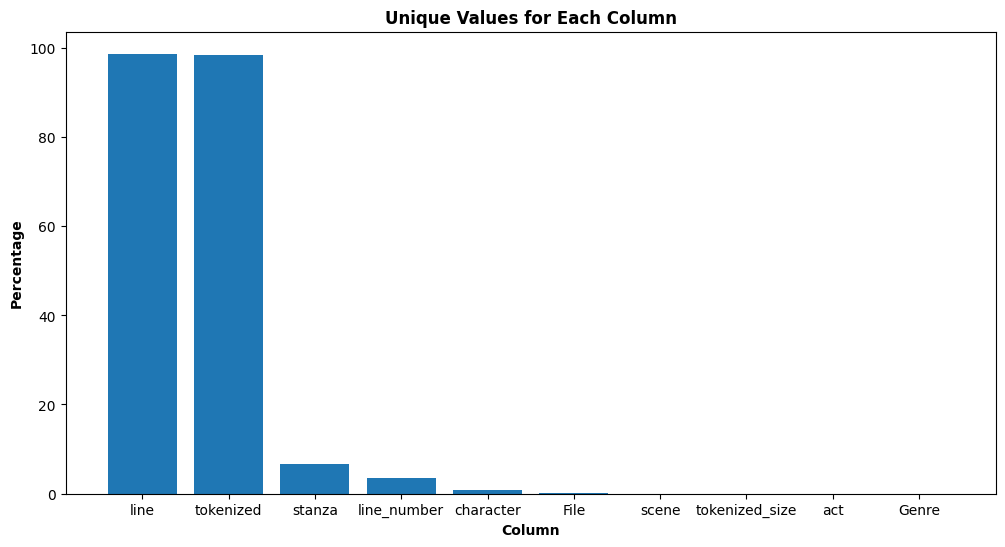

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(unique_df['Column Name'], unique_df['Unique Values Percentage'])
plt.title('Unique Values for Each Column', weight='bold')
plt.xlabel('Column', weight='bold')
plt.ylabel('Percentage', weight='bold')
plt.show()

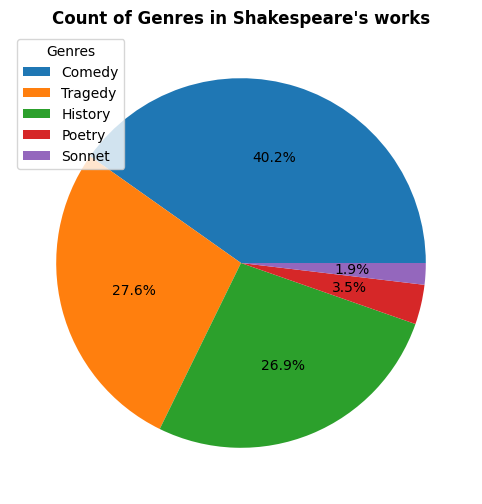

In [ ]:
plt.figure(figsize=(10,6))
ax = df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', labels=None)

plt.title("Count of Genres in Shakespeare's works", weight='bold')
plt.legend(labels=df['Genre'].value_counts().index.tolist(), title='Genres', loc='upper left')
ax.set_ylabel('')
plt.show()

In [ ]:
df['Poem']=df['Genre'].apply(lambda x: 'Poem' if x == 'Poetry' or x=='Sonnet' else 'Play')
df['Poem'].value_counts()

Poem
Play    108227
Poem      6125
Name: count, dtype: int64

In [ ]:
metadata['poetry'] = metadata['URL'].apply(lambda x: bool(re.search(r'/Poetry/',x, re.IGNORECASE)))
metadata.head()

Title   Genre  \
0  All's Well That Ends Well  Comedy   
1             As You Like It  Comedy   
2       The Comedy of Errors  Comedy   
3                  Cymbeline  Comedy   
4        Love's Labours Lost  Comedy   

                                                 URL               File  \
0     https://shakespeare.mit.edu/allswell/full.html       allswell.csv   
1  https://shakespeare.mit.edu/asyoulikeit/full.html    asyoulikeit.csv   
2  https://shakespeare.mit.edu/comedy_errors/full...  comedy_errors.csv   
3    https://shakespeare.mit.edu/cymbeline/full.html      cymbeline.csv   
4          https://shakespeare.mit.edu/lll/full.html            lll.csv   

   poetry  
0   False  
1   False  
2   False  
3   False  
4   False

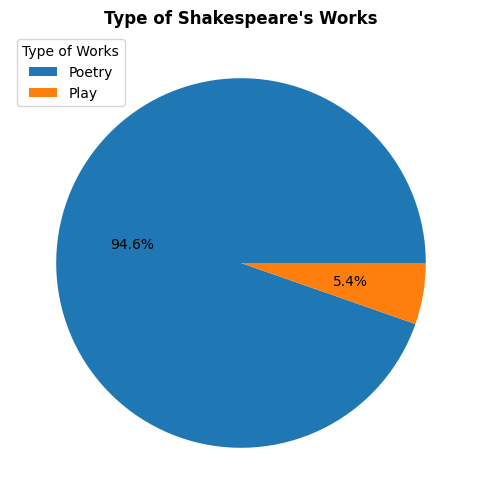

In [ ]:
plt.figure(figsize=(10,6))
ax = df['Poem'].value_counts().plot.pie(autopct='%1.1f%%', labels=None)
plt.title("Type of Shakespeare's Works", weight='bold')
plt.legend(labels=['Poetry', 'Play'], title='Type of Works', loc='upper left')
ax.set_ylabel('')
plt.show()

In [ ]:
# data based on the genre
df.groupby(['Genre']).nunique()

line  line_number  act  scene  character  stanza  File  tokenized  \
Genre                                                                         
Comedy   45339         3748    5     12        381       0    17      45237   
History  30558         3700    5     12        344       0    10      30512   
Poetry    3969         1858    0      0          0     266     4       3969   
Sonnet    2154           15    0      0          0       0   154       2154   
Tragedy  31184         4011    5     16        332       0    10      31081   

         tokenized_size  Poem  
Genre                          
Comedy               17     1  
History              15     1  
Poetry               13     1  
Sonnet                8     1  
Tragedy              16     1

## Text Visualization

In [ ]:
line_text = ''.join(df['line'])
line_text

'lo! as a careful housewife runs to catchone of her feather\'d creatures broke away,sets down her babe and makes an swift dispatchin pursuit of the thing she would have stay,whilst her neglected child holds her in chase,cries to catch her whose busy care is bentto follow that which flies before her face,not prizing her poor infant\'s discontent;so runn\'st thou after that which flies from thee,whilst i thy babe chase thee afar behind;but if thou catch thy hope, turn back to me,and play the mother\'s part, kiss me, be kind:so will i pray that thou mayst have thy \'will,\'if thou turn back, and my loud crying still.betwixt mine eye and heart a league is took,and each doth good turns now unto the other:when that mine eye is famish\'d for a look,or heart in love with sighs himself doth smother,with my love\'s picture then my eye doth feastand to the painted banquet bids my heart;another time mine eye is my heart\'s guestand in his thoughts of love doth share a part:so, either by thy pictur

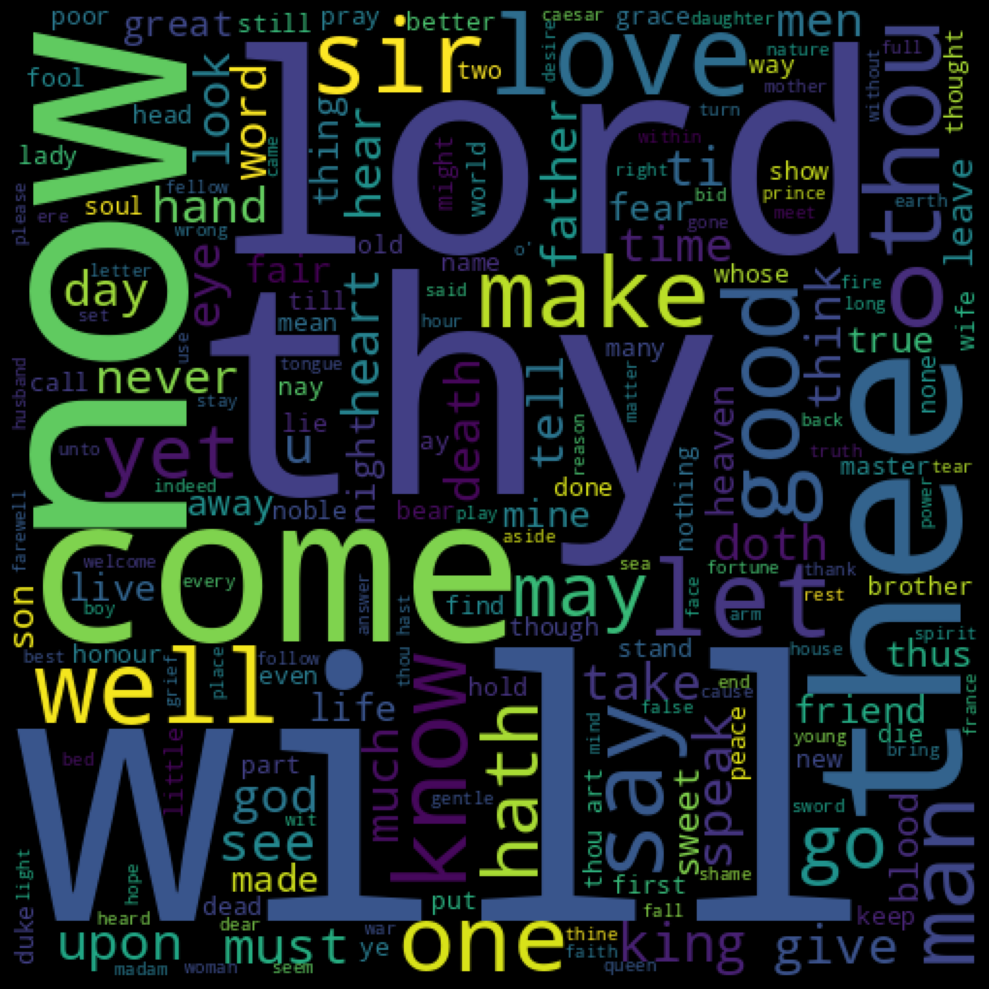

In [ ]:
ax = WordCloud(width=500, height=500).generate(line_text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(ax)
plt.axis("off")
plt.tight_layout()
plt.show()